<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Moire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -q jarvis-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.4 MB/s eta 0:00:00


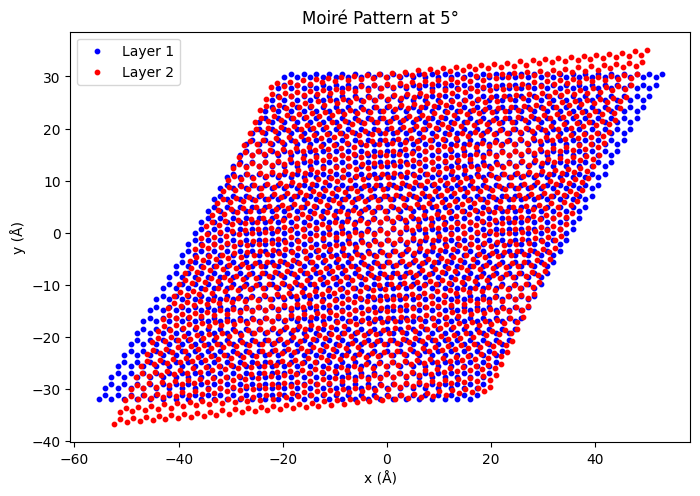

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_lattice(lattice_matrix, atomic_positions, size):
    """Generate a 2D lattice for a material using a 3x3 lattice matrix.

    Parameters:
    - lattice_matrix: 3x3 matrix defining the lattice vectors (3rd column for out-of-plane).
    - atomic_positions: List of atomic positions within the unit cell.
    - size: Range of unit cells to generate in each direction.

    Returns:
    - coords: Array of atomic coordinates for the 2D lattice.
    """
    a1, a2, _ = lattice_matrix.T  # Extract in-plane lattice vectors

    # Generate lattice points by iterating over the grid
    coords = []
    for i in range(-size, size):
        for j in range(-size, size):
            for pos in atomic_positions:
                point = i * a1 + j * a2 + pos
                coords.append(point)
    return np.array(coords)

def rotate_layer(coords, angle_deg):
    """Rotate a layer by a specified angle in degrees."""
    angle_rad = np.radians(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    return coords @ rotation_matrix.T  # Apply rotation in 3D

def plot_moire_pattern(layer1_coords, layer2_coords, title="Moiré Pattern"):
    """Plot the moiré pattern created by two layers."""
    plt.figure(figsize=(8, 8))
    plt.scatter(layer1_coords[:, 0], layer1_coords[:, 1], color='blue', s=10, label='Layer 1')
    plt.scatter(layer2_coords[:, 0], layer2_coords[:, 1], color='red', s=10, label='Layer 2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.xlabel('x (Å)')
    plt.ylabel('y (Å)')
    plt.legend()
    plt.show()

# Example for Graphene with 3x3 lattice matrix
lattice_constant = 2.46  # Graphene lattice constant in Å
lattice_matrix = np.array([
    [lattice_constant, lattice_constant / 2, 0],
    [0, lattice_constant * np.sqrt(3) / 2, 0],
    [0, 0, 20]  # Arbitrarily large c-axis for 2D materials
])

# Atomic positions in the graphene unit cell
atomic_positions = [
    np.array([0, 0, 0]),
    np.array([lattice_constant / 2, lattice_constant * np.sqrt(3) / 6, 0])
]

# General parameters
size = 15  # Range for unit cell repetitions
twist_angle = 5 #1.1  # Twist angle in degrees for magic-angle bilayer

# Generate the two layers
layer1_coords = generate_2d_lattice(lattice_matrix, atomic_positions, size)
layer2_coords = rotate_layer(layer1_coords, twist_angle)

# Plot the resulting moiré pattern
plot_moire_pattern(layer1_coords, layer2_coords, title=f'Moiré Pattern at {twist_angle}°')
